In [ ]:
!pip install xlsxwriter
!pip install cssselect 
!pip install dask[complete]

     |████████████████████████████████| 148 kB 5.2 MB/s 
     |████████████████████████████████| 125 kB 5.4 MB/s 
     |████████████████████████████████| 786 kB 39.5 MB/s 
     |████████████████████████████████| 779 kB 39.8 MB/s 
     |████████████████████████████████| 778 kB 31.3 MB/s 
     |████████████████████████████████| 776 kB 34.9 MB/s 
     |████████████████████████████████| 769 kB 40.1 MB/s 
     |████████████████████████████████| 766 kB 40.9 MB/s 
     |████████████████████████████████| 1.0 MB 39.9 MB/s 
     |████████████████████████████████| 722 kB 33.2 MB/s 
     |████████████████████████████████| 722 kB 43.7 MB/s 
     |████████████████████████████████| 715 kB 44.7 MB/s 
     |████████████████████████████████| 705 kB 42.0 MB/s 
     |████████████████████████████████| 699 kB 35.4 MB/s 
     |████████████████████████████████| 696 kB 44.4 MB/s 
     |████████████████████████████████| 684 kB 42.4 MB/s 
     |████████████████████████████████| 679 kB 42.8 MB/s 
     |██████████

In [ ]:
# importing all the required libraries
import sys
import datetime
import pandas as pd                          # package to store and manipulate data
import numpy as np                           # package to store and manipulate data
import matplotlib.pyplot as plt              # plotting package
import operator
from collections import Counter
import itertools  
import collections
import urllib.request 
import dask.dataframe as dd
from geopy.geocoders import Nominatim
import seaborn as sns                        # plotting package 
import sklearn                               # model building package
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import re                                    # packages to clean text
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
import nltk as nlp
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.colors as mcolors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('drive/My Drive/Dataset for Detection of Cyber-Trolls.csv')  # loading dataset from google drive

In [ ]:
df.head()

,content,annotation/notes,annotation/label/0,extras
0,Get fucking real dude.,NaN,1,NaN
1,She is as dirty as they come and that crook ...,NaN,1,NaN
2,why did you fuck it up. I could do it all day...,NaN,1,NaN
3,Dude they dont finish enclosing the fucking s...,NaN,1,NaN
4,WTF are you talking about Men? No men thats n...,NaN,1,NaN


In [ ]:
df.describe()

,annotation/notes,annotation/label/0,extras
count,0.0,20001.000000,0.0
mean,NaN,0.391080,NaN
std,NaN,0.488005,NaN
min,NaN,0.000000,NaN
25%,NaN,0.000000,NaN
50%,NaN,0.000000,NaN
75%,NaN,1.000000,NaN
max,NaN,1.000000,NaN


In [ ]:
df['sample_tweet_text'] = df['content']  # renaming feature

In [ ]:
# This function will extract the twitter handles of retweed people
def find_retweeted(sample_tweet_text):
     return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', sample_tweet.text)

In [ ]:
# This function will extract the twitter handles of people mentioned in the tweet
def find_mentioned(sample_tweet_text):
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', sample_tweet_text)

In [ ]:
# This function will extract hashtags
def find_hashtags(sample_tweet_text):
     return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)',  sample_tweet_text)

In [ ]:
# Takes a string and removes web links from it   
def remove_links(sample_tweet_text):
    sample_tweet_text = re.sub(r'http\S+', '', sample_tweet_text)
    sample_tweet_text = re.sub(r'bit.ly/\S+', '', sample_tweet_text)
    sample_tweet_text = sample_tweet_text.strip('[link]')
    return sample_tweet_text

In [ ]:
# Takes a string and removes retweet and @user information
def remove_users(sample_tweet_text):
    sample_tweet_text = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', sample_tweet_text)
    sample_tweet_text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', sample_tweet_text)
    return sample_tweet_text

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

In [ ]:
df['sample_tweet_text'] = df['sample_tweet_text'].str.replace('[^\w\s]','')

In [ ]:
# cleaning tweet function
clean_tweet = []
for sample_tweet_text in df.sample_tweet_text: 
    sample_tweet_text = re.sub('[^a-zA-Z]',' ',str(sample_tweet_text))
    sample_tweet_text = sample_tweet_text.lower()               # lower case
    sample_tweet_text = remove_users(sample_tweet_text)         # remove user mentions 
    sample_tweet_text = remove_links(sample_tweet_text)         # remove links 
    sample_tweet_text = nltk.word_tokenize(sample_tweet_text)   # tokenization 
    tweet_token = [ word for word in sample_tweet_text if not word in set(stopwords.words('english'))]  # remove stopwords 
    tweet_token = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token]
    sample_tweet_text = " ".join(tweet_token)
    clean_tweet.append(sample_tweet_text)

In [ ]:
#clean text
clean_tweet

['get fuck real dude',
 'dirti come crook rengel dem fuck corrupt joke make republican look like',
 'fuck could day let hour ping later sched write book',
 'dude dont finish enclos fuck shower hate half ass job what reasonon behind make sens',
 'wtf talk men men that menag that gay',
 'save troubl sister come big ol fuck franc block come way twitter',
 'im dead seriousr athlet never cheat dont even appear level fuck dude serious think',
 'go absolut insaneh bearer bad newsloldont shoot messeng caus know bought pisto',
 'mao im watch thing ahaha gay guy hilari dede good day dont want anyon mess',
 'ol said call jail cell gay guy paradis ahaha',
 'truth count guy ass product sub par tell peopl tri dalesandro orjim',
 'shakespear nerd',
 'fuck dor',
 'heh fuck em',
 'damn total forgot one',
 'wow damn would piss',
 'gga u geigh lmao fuck yo final beeeeeitch',
 'suck',
 'read morn fav straight say cum shot',
 'unibrou anoth damn good unibrou',
 'damn evil minut ipa beckon fridg right',
 'f

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.3 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # importing vader sentiment tool

In [ ]:
# creating object of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# creating new column of cleaned tweets 
df['clean_tweet'] = df['sample_tweet_text'].apply(lambda clean_tweet:clean_tweet)

In [ ]:
df.head()

,content,annotation/notes,annotation/label/0,extras,sample_tweet_text,clean_tweet
0,Get fucking real dude.,NaN,1,NaN,Get fucking real dude,Get fucking real dude
1,She is as dirty as they come and that crook ...,NaN,1,NaN,She is as dirty as they come and that crook ...,She is as dirty as they come and that crook ...
2,why did you fuck it up. I could do it all day...,NaN,1,NaN,why did you fuck it up I could do it all day ...,why did you fuck it up I could do it all day ...
3,Dude they dont finish enclosing the fucking s...,NaN,1,NaN,Dude they dont finish enclosing the fucking s...,Dude they dont finish enclosing the fucking s...
4,WTF are you talking about Men? No men thats n...,NaN,1,NaN,WTF are you talking about Men No men thats no...,WTF are you talking about Men No men thats no...


In [ ]:
sid.polarity_scores(df.iloc[0]['clean_tweet'])    # example of first row polarity score 

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
# applying polarity scores to the cleaned tweets and making new column as scores
df['scores'] = df['clean_tweet'].apply(lambda clean_tweet:sid.polarity_scores(str(clean_tweet)))

In [ ]:
# making new column as compund scores 
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [ ]:
df['score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [ ]:
df.head()

,content,annotation/notes,annotation/label/0,extras,sample_tweet_text,clean_tweet,scores,compound,score
0,Get fucking real dude.,NaN,1,NaN,Get fucking real dude,Get fucking real dude,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,She is as dirty as they come and that crook ...,NaN,1,NaN,She is as dirty as they come and that crook ...,She is as dirty as they come and that crook ...,"{'neg': 0.101, 'neu': 0.734, 'pos': 0.164, 'co...",0.2023,pos
2,why did you fuck it up. I could do it all day...,NaN,1,NaN,why did you fuck it up I could do it all day ...,why did you fuck it up I could do it all day ...,"{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'comp...",-0.5423,neg
3,Dude they dont finish enclosing the fucking s...,NaN,1,NaN,Dude they dont finish enclosing the fucking s...,Dude they dont finish enclosing the fucking s...,"{'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'comp...",-0.7322,neg
4,WTF are you talking about Men? No men thats n...,NaN,1,NaN,WTF are you talking about Men No men thats no...,WTF are you talking about Men No men thats no...,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",-0.7739,neg


In [ ]:
# function for assigning tweets as positive, negative, neutral
summary = {"positive":0,"neutral":0,"negative":0}
for clean_tweet in df.clean_tweet: 
    ss = sid.polarity_scores(str(clean_tweet))
    if ss["compound"] == 0.0:                  # assigned as neutral if compound score is 0
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:                  # assigned as positive if compound score greater than 0
        summary["positive"] +=1
    else:
        summary["negative"] +=1                 # assigned as negative if compound score less than 0
print(summary)

{'positive': 6494, 'neutral': 3371, 'negative': 10136}


In [ ]:
# creating dataframe of above seniments dictionary
data_items = summary.items()
data_list = list(data_items)
df_sentiment = pd.DataFrame(data_list)

In [ ]:
print(df_sentiment)

          0      1
0  positive   6494
1   neutral   3371
2  negative  10136


In [ ]:
df_sentiment.set_axis(["sentiment", "number_of_tweets"], axis =1, inplace =True)

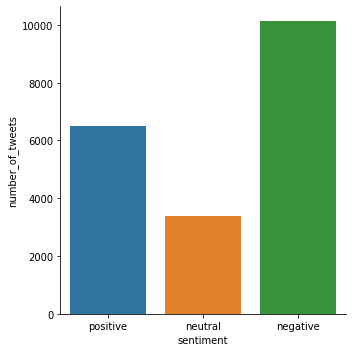

In [ ]:
# visualizing sentiment of tweets
sns.catplot(x="sentiment", y="number_of_tweets", kind="bar", data=df_sentiment)